# **Análise Exploratória de Dados (EDA)**

### Contexto de Negócio
Empresas B2B que utilizam sistemas ERP podem cancelar seus contratos sem aviso prévio,
impactando diretamente a receita recorrente.

Este projeto tem como objetivo analisar o comportamento dos clientes e identificar
padrões associados ao churn (cancelamento), simulando o contexto de clientes ERP.

-----------------------------------------------

## **1. Importação das Bibliotecas**

In [652]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")


## **2. Carregamento dos Dados**

Os dados utilizados são provenientes do dataset público "IBM Telco Customer Churn",
adaptado para o contexto de clientes ERP.

E estão disponíveis na plataforma Kaggle, link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

-----------------------------------------------

In [653]:
df = pd.read_csv("../data/raw/telco_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



-----------------------------------------------
## **3. Dicionário de dados**

**Dados Pessoais:**
- ID_Cliente → Código único do cliente
- Gênero → Masculino ou Feminino
- Idoso → Maior de 65 anos? (Sim=1/Não=0)

**Família:**
- Parceiro → Tem marido/esposa? (Sim/Não)
- Dependentes → Tem filhos/pais sob cuidados? (Sim/Não)

**Contrato:**
- Tempo_de_Contrato → Meses como cliente
- Tipo_de_Contrato → Plano (Mensal/Anual/2 anos)
- Cancelamento → ⭐ Saiu da empresa? (Sim/Não)

**Serviços:**
- Serviço_Telefônico → Tem telefone? (Sim/Não)
- Múltiplas_Linhas → Várias linhas? (Sim/Não/Não tem)
- Serviço_de_Internet → Internet (DSL/Fibra/Nenhuma)
- Segurança_Online, Backup_Online, Proteção_de_Dispositivo, Suporte_Técnico → Serviços extras
- Streaming_TV, Streaming_Filmes → Streaming

**Pagamento:**
- Fatura_Digital → Boleto digital? (Sim/Não)
- Método_de_Pagamento → Como paga (Cartão/Boleto/etc.)
- Cobrança_Mensal → Valor por mês
- Cobrança_Total → Total já pago

-----------------------------------------------

## **4. Visão Geral do Dataset**

Nesta etapa analisamos:
- Quantidade de registros
- Tipos de dados
- Presença de valores nulos

In [654]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [655]:
colunas_para_converter = ['SeniorCitizen'] 

for coluna in colunas_para_converter:
    if coluna in df.columns:
        df[coluna] = df[coluna].astype(str)
        df[coluna] = df[coluna].replace({'0': 'Não', '1': 'Sim'})
        print(f"Coluna '{coluna}' convertida: 0 → 'Não', 1 → 'Sim'")

Coluna 'SeniorCitizen' convertida: 0 → 'Não', 1 → 'Sim'


In [656]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0).astype(int)

In [657]:
df.describe().round(2)

,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00
mean,32.37,64.76,2279.27
std,24.56,30.09,2266.79
min,0.00,18.25,0.00
25%,9.00,35.50,398.00
50%,29.00,70.35,1394.00
75%,55.00,89.85,3786.50
max,72.00,118.75,8684.00


**🔴 Sinalização Visual:** Cada elemento vermelho nos gráficos representa um cliente perdido. Esta escolha cromática transforma dados abstratos em alertas visuais, guiando nossa atenção para onde a ação é mais necessária.

-----------------------------------------------

## **5. Distribuição de Churn**

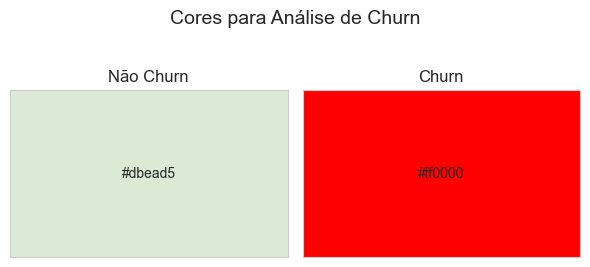

In [658]:
cores_churn = {
    'Não Churn': '#dbead5', 
    'Churn': '#ff0000'   
}

fig, axs = plt.subplots(1, 2, figsize=(6, 2.5))
for ax, (categoria, cor) in zip(axs, cores_churn.items()):
    ax.set_facecolor(cor)
    ax.text(0.5, 0.5, cor, ha='center', va='center')
    ax.set_title(categoria)
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle('Cores para Análise de Churn', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

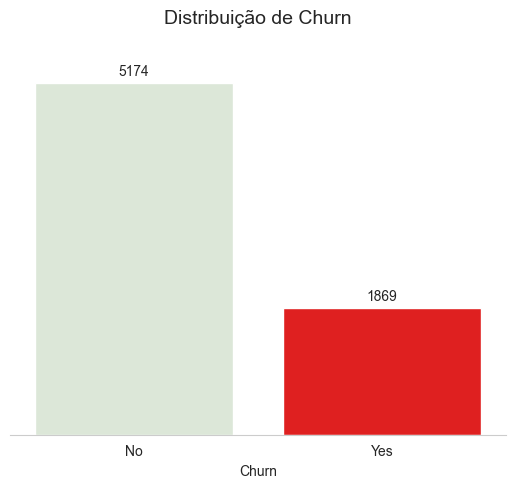

In [659]:
verde_pastel = '#dbead5'  
vermelho_pastel = '#ff0000'
cores_churn = [verde_pastel, vermelho_pastel] 

ax = sns.countplot(data=df, x='Churn', palette=[verde_pastel, vermelho_pastel])
plt.title("Distribuição de Churn", pad=30, fontsize=14)

ax.yaxis.set_visible(False)
plt.grid(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=3)

plt.show()

In [660]:
print(f"De acordo com o dataset há cerca de {df['Churn'].value_counts(normalize=True).get('Yes', 0)*100:.1f}% de clientes que cometeram churn.")

De acordo com o dataset há cerca de 26.5% de clientes que cometeram churn.


-----------------------------------------------

## **6. Variáveis em Relação ao Churn**

Nesta seção são analisadas variáveis demográficas, de serviços contratados
e financeiras, avaliando seu impacto no churn de clientes ERP.

In [661]:
import sys
import os
sys.path.append(os.path.abspath("../src"))

from graficos_churn import grafico_boxplot, grafico_histograma, grafico_barras

## **6.1 Perfil do Cliente**
Variáveis relacionadas às características demográficas e familiares.

### 6.1.1 Gênero

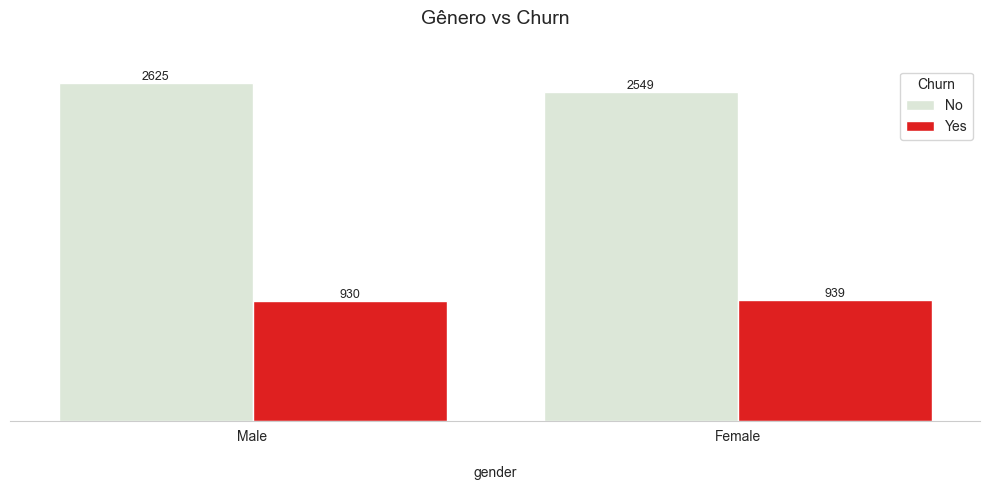

In [662]:
grafico_barras(df, 'gender', 'Gênero vs Churn')

Conforme evidenciado pela análise visual, a variável "gênero" demonstra uma distribuição equilibrada de Churn entre as categorias masculino e feminino, indicando que este fator demográfico não exerce influência significativa sobre a decisão de cancelamento do serviço.

### 6.1.2 Idoso


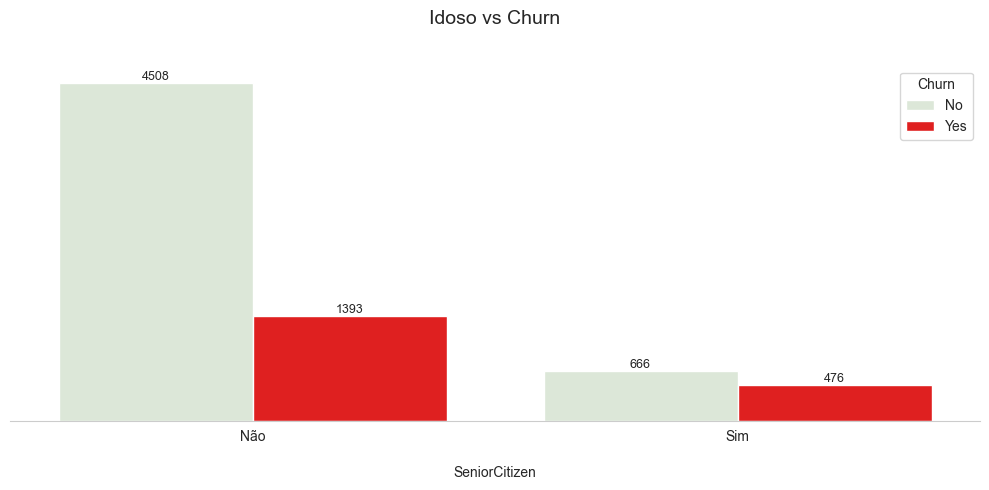

In [663]:
grafico_barras(df, 'SeniorCitizen', 'Idoso vs Churn')

A análise por faixa etária revela um padrão preocupante: entre os clientes idosos (65+ anos), 476 dos 1.142 cancelaram o serviço, resultando em uma taxa de churn de 41,7% — significativamente superior à observada entre clientes mais jovens, onde apenas 1.393 de 5.901 optaram pelo cancelamento (23,6%). Esta disparidade evidencia que a população idosa apresenta maior propensão a desistir do serviço, sugerindo a necessidade de estratégias de retenção específicas para este segmento.

### 6.1.3 Parceiro


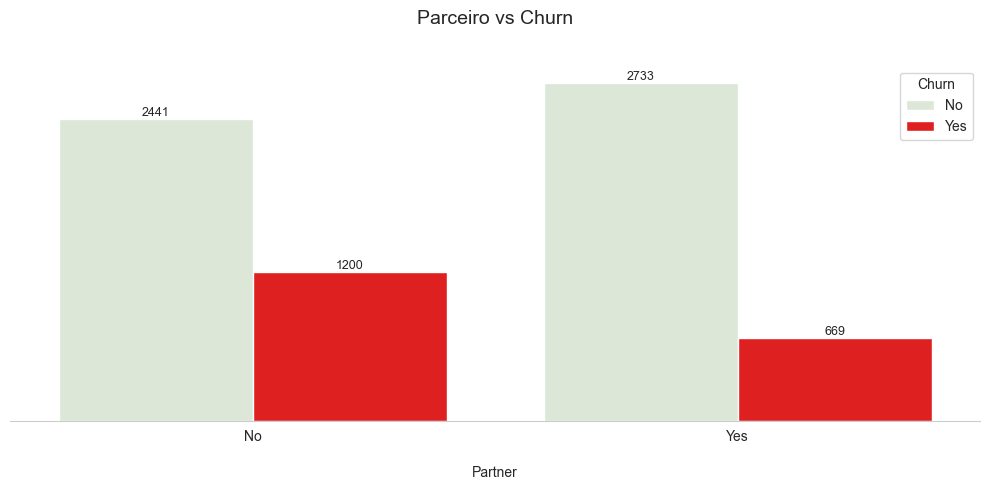

In [664]:
grafico_barras(df, 'Partner', 'Parceiro vs Churn')

De acordo com a análise, entre os clientes sem múltiplas linhas telefônicas (3.390), 849 deram churn, resultando em uma taxa de 25%. Já entre os que possuem múltiplas linhas (2.971), 850 também deram churn, com taxa semelhante de aproximadamente 28,6%. No grupo sem serviço de telefone (682), 170 deixaram a empresa, apresentando a menor taxa de churn, cerca de 24,9%.

### 6.1.4 Dependentes


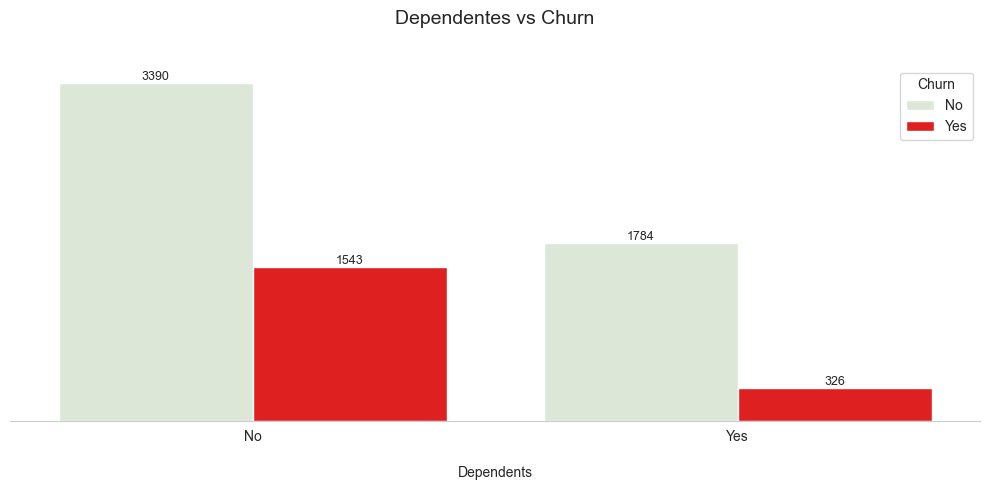

In [665]:
grafico_barras(df, 'Dependents', 'Dependentes vs Churn')

A análise por dependentes revela um contraste expressivo: entre os 4.933 clientes sem dependentes, 1.543 optaram pelo cancelamento, resultando em uma expressiva taxa de churn de 31,3%. Em contrapartida, entre os 2.110 clientes com dependentes, apenas 326 desistiram do serviço, correspondendo a uma taxa de churn significativamente menor de 15,4% — menos da metade da observada no primeiro grupo. Esta diferença acentuada sugere que responsabilidades familiares atuam como fator estabilizador, reduzindo a propensão a mudanças e aumentando a fidelidade aos serviços.

## **6.2 Serviços Contratados**
Análise dos serviços e módulos utilizados pelos clientes.

### 6.2.1 Serviço Telefônico

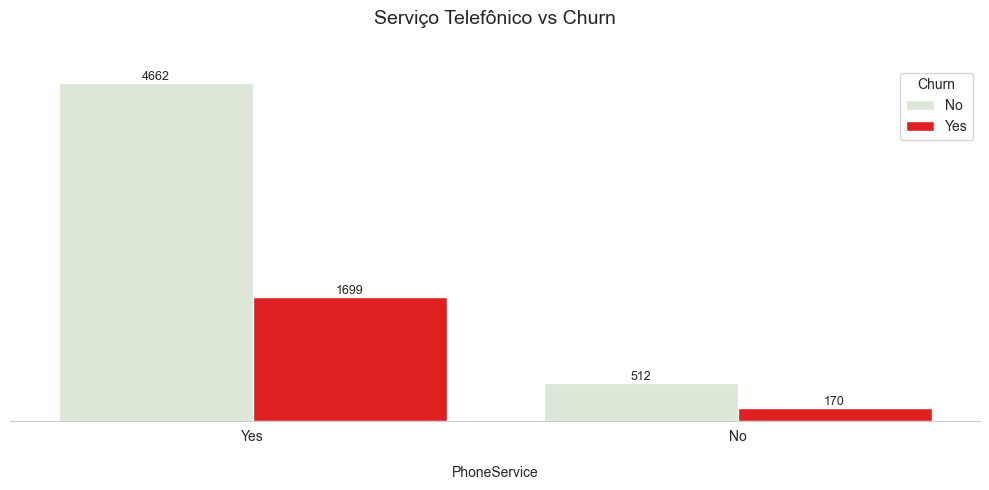

In [666]:
grafico_barras(df, 'PhoneService', 'Serviço Telefônico vs Churn')

A análise do serviço telefônico revela dados interessantes: dos 6.361 clientes que possuem ou possuíam o serviço telefônico, 1.699 cancelaram, resultando em uma taxa de churn de 26,7%. Entre os 682 clientes sem serviço telefônico, apenas 170 desistiram, correspondendo a uma taxa de churn de 24,9% — ligeiramente inferior, porém sem diferença estatística marcante. Os números mostram que 90,3% da base total (6.361 de 7.043 clientes) utiliza o serviço telefônico, indicando sua centralidade no pacote de serviços, mas também revelando que sua presença não representa um diferencial significativo na retenção de clientes.

### 6.2.2 Múltiplas Linhas


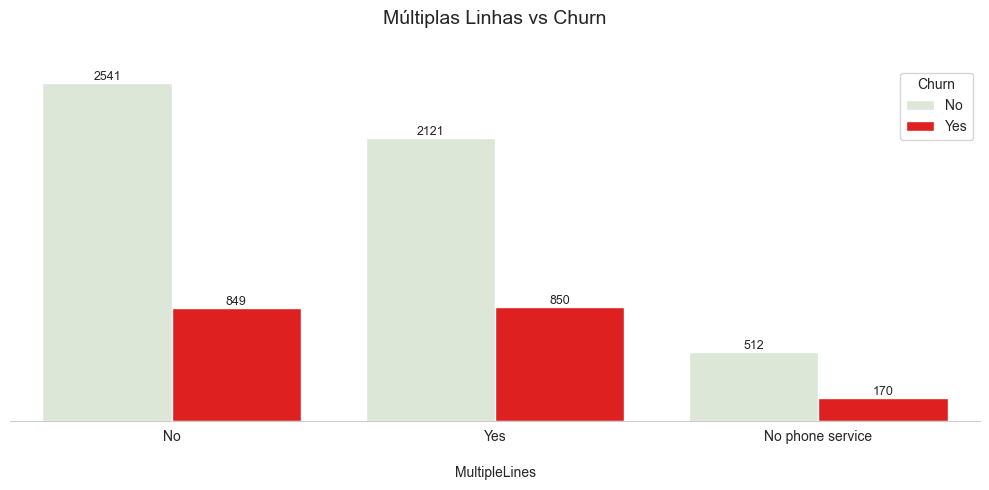

In [667]:
grafico_barras(df, 'MultipleLines', 'Múltiplas Linhas vs Churn')

De acordo com a análise, a posse de múltiplas linhas telefônicas não se mostrou um fator crítico para o churn, pois as taxas de evasão foram similares entre os grupos: 25,0% entre os clientes sem múltiplas linhas (849 de 3.390), 28,6% entre os que possuem múltiplas linhas (850 de 2.971) e 24,9% entre os sem serviço de telefone (170 de 682). Esses valores próximos indicam que a oferta ou não de múltiplas linhas tem pouca influência isolada na decisão de cancelamento.

### 6.2.3 Serviço de Internet

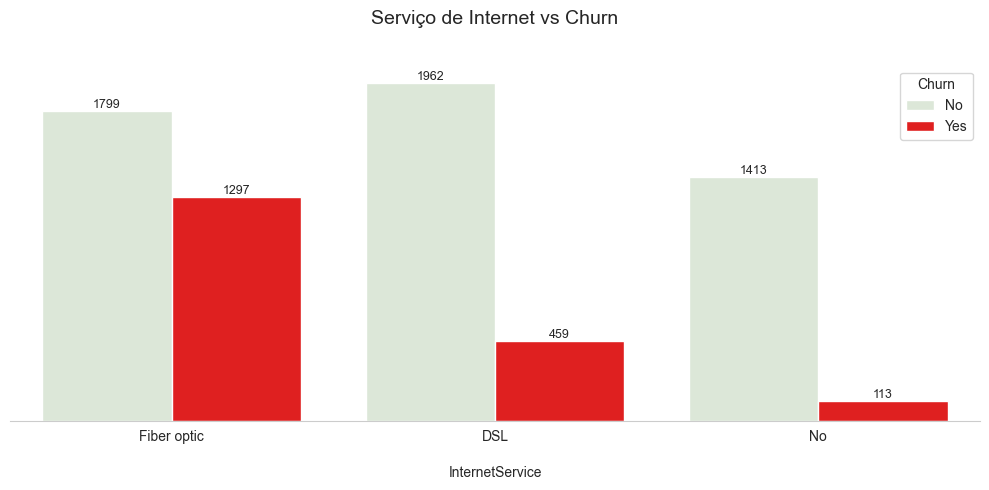

In [668]:
grafico_barras(df, 'InternetService', 'Serviço de Internet vs Churn')

Em relação ao serviço de internet, a análise revela diferenças significativas na taxa de churn por tipo de conexão. Entre os clientes com fibra óptica (3.096), 1.297 deixaram a empresa, resultando em uma taxa de churn elevada de aproximadamente 41,9%. Já os clientes com DSL (2.421) apresentaram um índice bem menor, com 459 casos de churn e uma taxa de 19%. O grupo sem serviço de internet (1.526), por sua vez, registrou apenas 113 desistências, com a menor taxa observada: cerca de 7,4%. 

### 6.2.4 Segurança Online

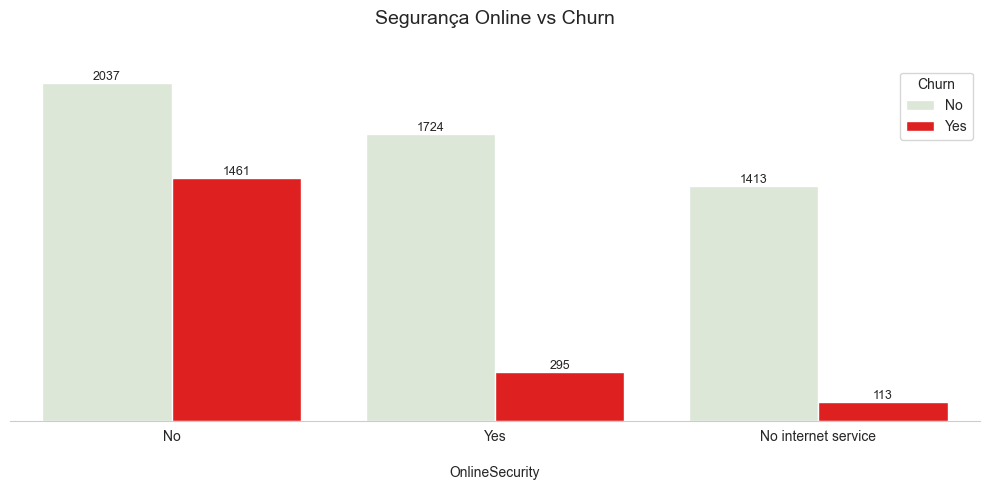

In [669]:
grafico_barras(df, 'OnlineSecurity', 'Segurança Online vs Churn')

A análise dos serviços de segurança online revela um impacto marcante na retenção de clientes. Entre os 3.498 clientes sem o serviço, 1.461 deram churn, gerando uma taxa de 41,8%. Por outro lado, entre os 2.019 que possuem segurança online, apenas 295 deixaram a empresa, resultando numa taxa de 14,6% — menos de um terço da anterior. Esses números destacam que a oferta de segurança online está fortemente associada a uma maior fidelização, sugerindo seu valor estratégico na redução de evasão.

### 6.2.5 Backup Online


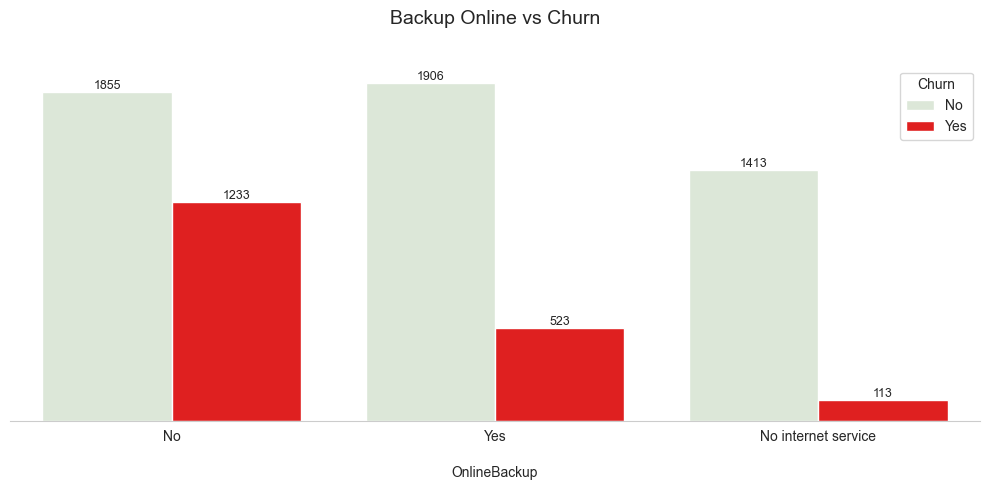

In [670]:
grafico_barras(df, 'OnlineBackup', 'Backup Online vs Churn')

Na análise do serviço de backup online, observa-se uma tendência clara de maior retenção entre os clientes que o possuem. Dos 3.088 que não contrataram o backup, 1.233 deixaram a empresa, resultando em uma taxa de churn de 39,9%. Em contrapartida, entre os 2.429 que possuem o serviço, apenas 523 deram churn, com uma taxa significativamente menor de 21,5%. Isso indica que o backup online pode atuar como um fator de fidelização, reduzindo a evasão em quase pela metade em relação ao grupo sem o serviço.

### 6.2.6 Proteção de Dispositivo

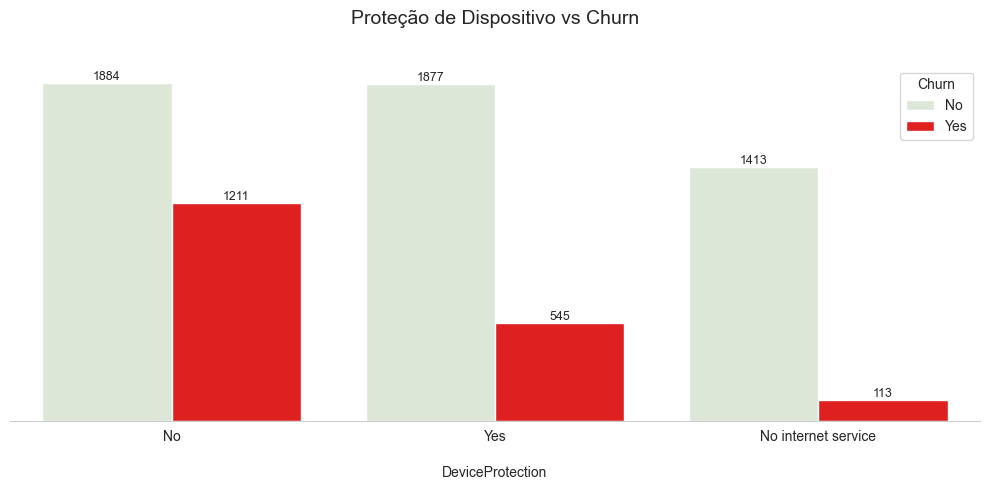

In [671]:
grafico_barras(df, 'DeviceProtection', 'Proteção de Dispositivo vs Churn')

A análise do serviço de proteção do dispositivo reforça o padrão observado em outros serviços adicionais: sua presença está associada a uma menor rotatividade de clientes. Dos 3.095 que não possuem a proteção, 1.211 deram churn, o que equivale a uma taxa de 39,1%. Já entre os 2.422 clientes com o serviço ativo, apenas 545 deixaram a empresa, resultando em uma taxa de churn de 22,5% — uma redução de quase metade em comparação ao grupo sem o serviço. Esse resultado destaca o potencial de serviços de proteção tecnológica como elementos estratégicos para aumentar a retenção na base de clientes.

### 6.2.7 Suporte Técnico

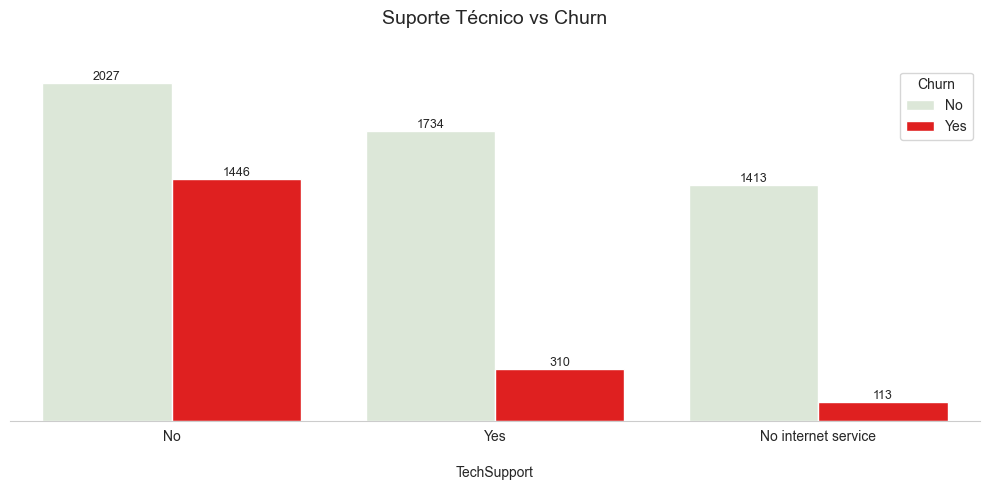

In [672]:
grafico_barras(df, 'TechSupport', 'Suporte Técnico vs Churn')

A análise do serviço de suporte técnico também evidencia seu impacto significativo na retenção de clientes. Entre os 3.473 que não possuem o suporte, 1.446 deram churn, gerando uma elevada taxa de 41,6%. Por outro lado, no grupo de 2.044 clientes que contam com o serviço, apenas 310 deixaram a empresa, resultando em uma taxa de churn de 15,2%. Essa diferença acentuada — o churn entre clientes sem suporte é quase o triplo — ressalta o papel crítico do suporte técnico na redução da evasão e na fidelização da base.

### 6.2.8 Streaming TV

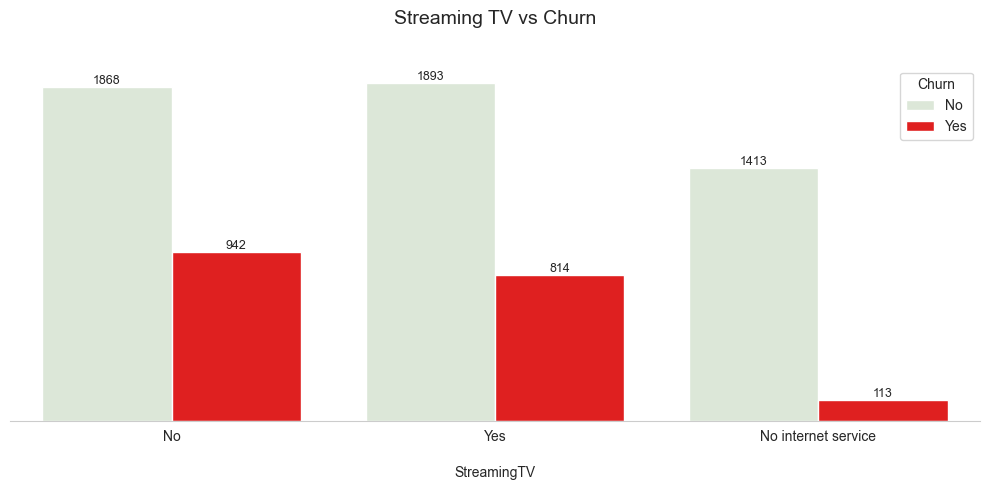

In [673]:
grafico_barras(df, 'StreamingTV', 'Streaming TV vs Churn')

Em relação ao serviço de streaming de TV, a análise não aponta uma diferença tão acentuada na retenção como em outros serviços adicionais. Dos 2.810 clientes sem o serviço, 942 deram churn, resultando em uma taxa de 33,5%. Já entre os 2.707 que possuem streaming de TV, 814 deixaram a empresa, com uma taxa ligeiramente maior, de 30,1%. A pequena variação observada sugere que, isoladamente, este serviço não exerce um impacto determinante sobre a fidelização dos clientes, diferindo do padrão visto em serviços como segurança online e suporte técnico.

### 6.2.9 Streaming Filmes

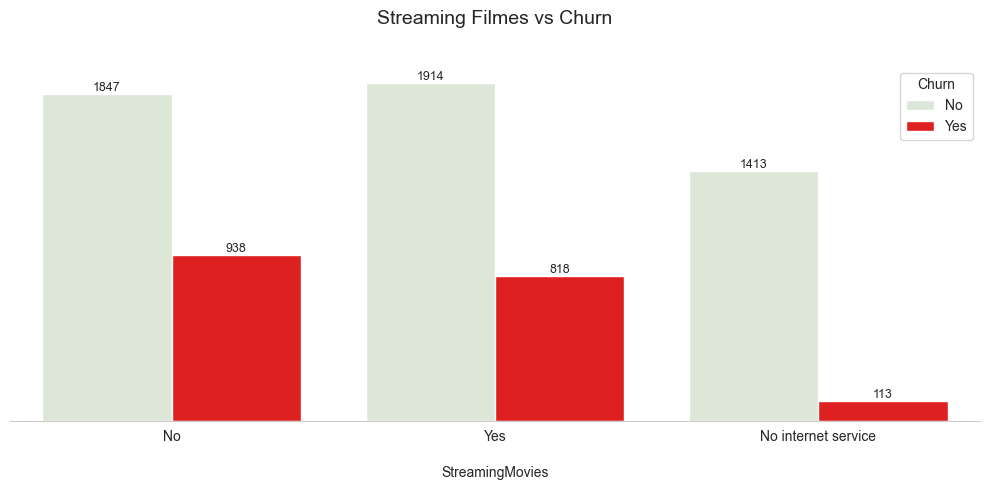

In [674]:
grafico_barras(df, 'StreamingMovies', 'Streaming Filmes vs Churn')

A análise do serviço de streaming de filmes apresenta um cenário semelhante ao do streaming de TV, sem uma influência decisiva na retenção. Dos 2.785 clientes sem o serviço, 938 deram churn, correspondendo a uma taxa de 33,7%. Entre os 2.732 que possuem streaming de filmes, 818 deixaram a empresa, com uma taxa de 29,9%. Embora haja uma leve vantagem no grupo com o serviço, a diferença é modesta, indicando que, sozinho, este benefício não se mostra um fator crítico para a redução do churn na base analisada.

## **6.3 Contrato e Pagamento**
Variáveis relacionadas ao modelo de contrato e cobrança.

### 6.3.1 Tipo de Contrato

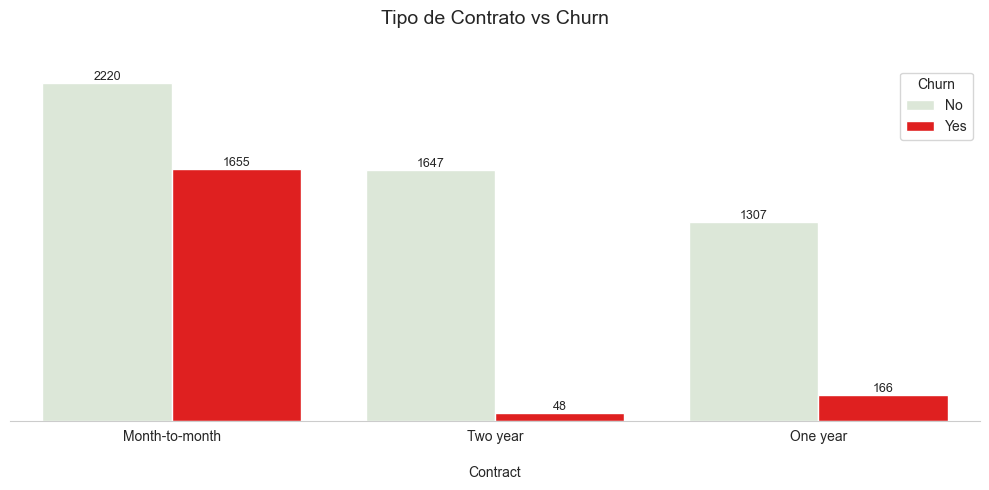

In [675]:
grafico_barras(df, 'Contract', 'Tipo de Contrato vs Churn')

A análise do tipo de contrato demonstra uma forte correlação entre a duração do compromisso e a retenção: clientes com contrato mensal apresentam uma taxa de churn alarmante de 42,7% (1.655 de 3.875), enquanto aqueles com contrato anual têm uma taxa significativamente menor de 11,3% (166 de 1.473), e os de dois anos registram o índice mais baixo, apenas 2,8% (48 de 1.695), evidenciando que compromissos de longo prazo são determinantes para reduzir a evasão.

### 6.3.2 Fatura Digital

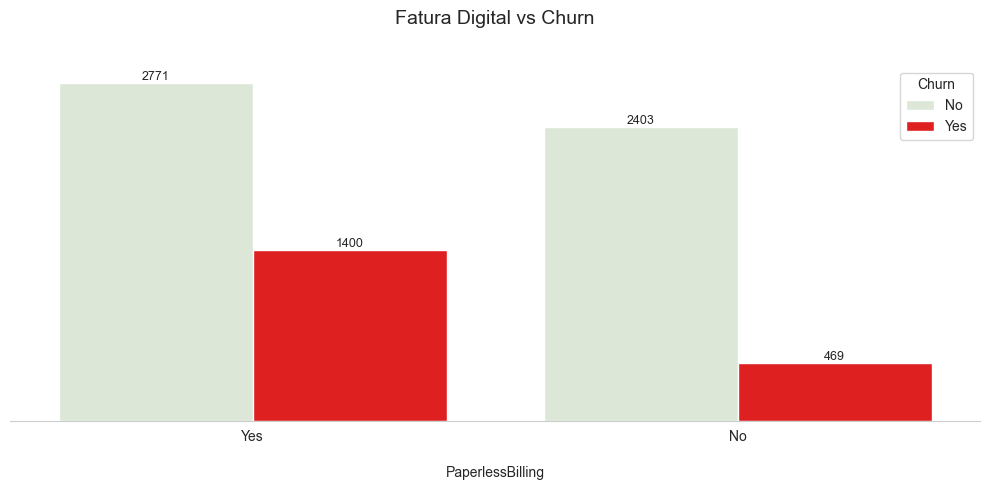

In [676]:
grafico_barras(df, 'PaperlessBilling', 'Fatura Digital vs Churn')

A análise da fatura digital revela um resultado contraintuitivo: clientes que aderiram ao serviço apresentaram uma taxa de churn maior. Dos 4.171 que optaram pela fatura digital, 1.400 deixaram a empresa, resultando em uma taxa de 33,6%. Em contrapartida, entre os 2.872 que não aderiram, apenas 469 deram churn, com uma taxa de 16,3%. Esse comportamento sugere que a simples oferta do serviço de fatura digital, por si só, não atua como fator de fidelização, podendo até estar associado a um perfil de cliente mais propenso à rotatividade.

### 6.3.3 Método de Pagamento

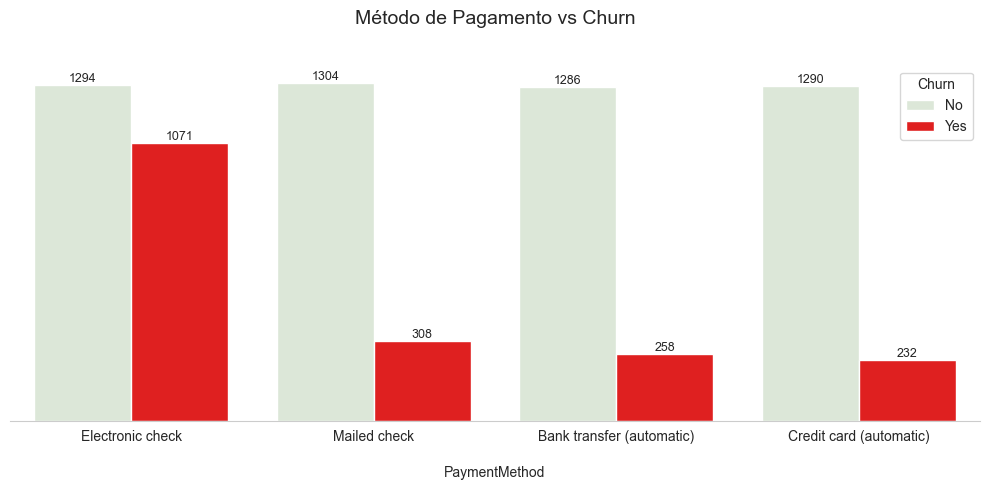

In [677]:
grafico_barras(df, 'PaymentMethod', 'Método de Pagamento vs Churn')

A análise dos métodos de pagamento mostra uma clara divisão: os automáticos (cartão e transferência) retêm muito mais clientes, com taxas de churn entre 15% e 17%, enquanto o check eletrônico, que exige ação manual mensal, apresenta a maior evasão, com 45% dos clientes saindo. O cheque por correio, apesar de manual, tem churn intermediário de 19%, sugerindo que a automatização é um fator-chave, mas não o único, na fidelização.

## **6.4 Variáveis Financeiras**
Análise de métricas de faturamento e valor do cliente.

### 6.4.1 Tempo de Contrato

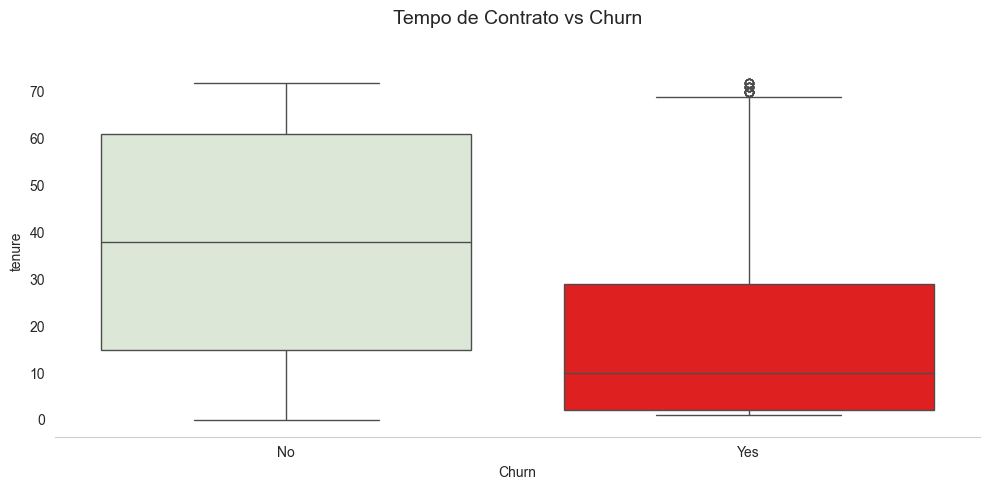

In [678]:
grafico_boxplot(df, 'tenure', 'Tempo de Contrato vs Churn')

O tempo de contrato é o principal fator associado ao churn.
Clientes que cancelam apresentam, em sua maioria, baixo tempo
de vínculo com a empresa, enquanto clientes com maior tenure
demonstram comportamento de retenção mais estável.

### 6.4.2 Cobrança Mensal

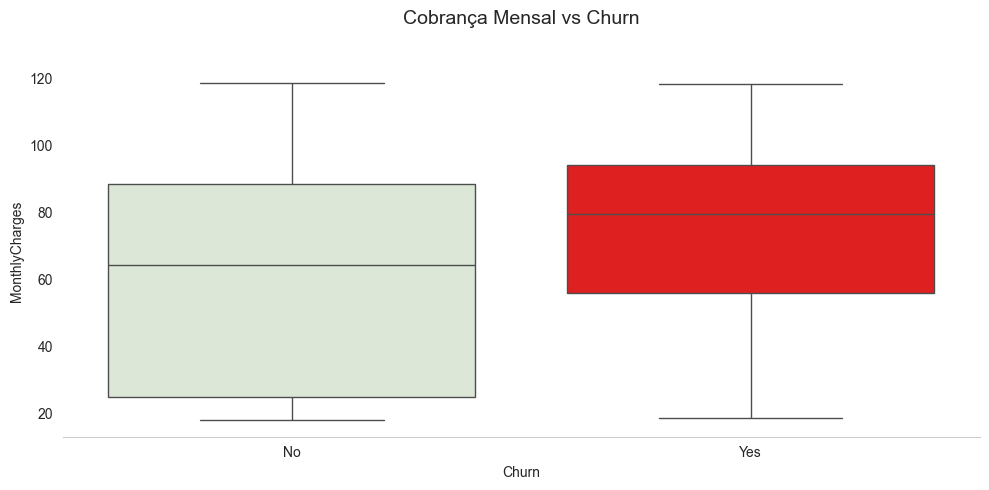

In [679]:
grafico_boxplot(df, 'MonthlyCharges', 'Cobrança Mensal vs Churn')

A análise da Cobrança Mensal (MonthlyCharges) mostra uma relação direta: conforme o valor da cobrança mensal aumenta, a proporção de clientes que dão Churn (Yes) também cresce significativamente. Isso sugere que planos mais caros — ou clientes com acréscimo de serviços — estão mais propensos a cancelar, possivelmente por perceberem menor custo-benefício ou por serem mais sensíveis a aumentos.

### 6.4.3 Cobrança Total

<Figure size 1200x600 with 0 Axes>

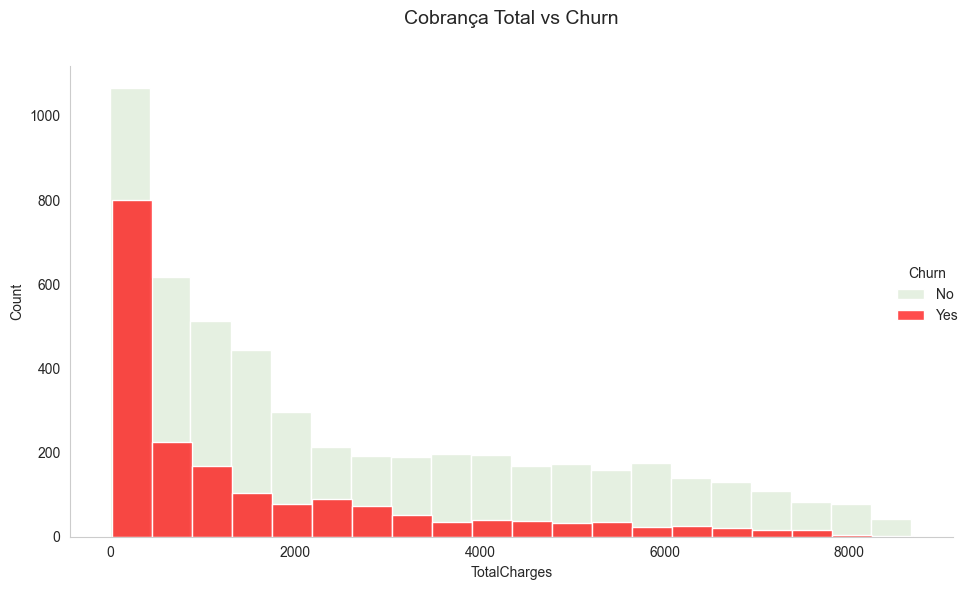

In [680]:
grafico_histograma(df, 'TotalCharges', 'Cobrança Total vs Churn')

Clientes que apresentam churn concentram-se em baixos valores de
cobrança total, indicando cancelamentos precoces. Por outro lado,
clientes com maior cobrança acumulada tendem a permanecer,
reforçando a importância da retenção nos primeiros meses de contrato.

-----------------------------------------------

## **7. Correlação entre Variáveis Numéricas**

Nesta etapa analisamos a relação entre o churn e:
- Variáveis numéricas (usando correlação de Pearson)

In [681]:
from graficos_churn import grafico_correlacao_numericas

### 7.1 Correlação com Variáveis Numéricas

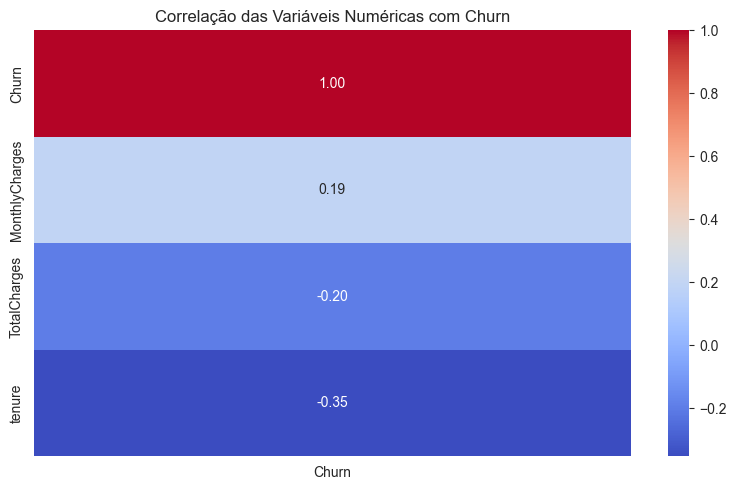

In [682]:
grafico_correlacao_numericas(df)

As variáveis numéricas apresentam correlação moderada com churn,
sendo o tempo de contrato (tenure) o principal fator de retenção.
Clientes com mensalidades mais altas e menor tempo de vínculo
apresentam maior propensão ao cancelamento.

-----------------------------------------------

## **8. Considerações finais**

### 8.1 Objetivo da análise

Esta análise exploratória teve como objetivo identificar padrões comportamentais e operacionais associados ao churn de clientes, fornecendo subsídios para a construção de um modelo preditivo e para a definição de estratégias de retenção.

### 8.2 Síntese dos principais achados

Os resultados evidenciam que o churn não ocorre de forma aleatória, mas está fortemente associado a fatores contratuais, comportamentais e de engajamento com o serviço. Em especial, destacam-se:

- O tempo de contrato como o fator mais determinante, com churn concentrado nos primeiros meses.

- Contratos de curto prazo, especialmente mensais, apresentam risco significativamente maior.

- A ausência de serviços de valor agregado (suporte técnico, segurança online) aumenta substancialmente a probabilidade de cancelamento.

- Determinados perfis demográficos e operacionais, como clientes idosos, usuários de fibra óptica e métodos de pagamento manuais, demandam atenção específica.

- Variáveis financeiras, como MonthlyCharges elevadas e baixo TotalCharges, reforçam a sensibilidade a preço e a importância da retenção inicial.

### 8.3 Implicações para o modelo preditivo

Com base nos insights obtidos, a análise indica que:

- Variáveis como tenure, Contract, MonthlyCharges, TotalCharges, TechSupport, OnlineSecurity e PaymentMethod devem ter alto poder preditivo.

- A presença de relações não lineares e interações entre variáveis justifica o uso de modelos baseados em árvores, como Random Forest e XGBoost.

### 8.4 Implicações estratégicas para o negócio

Do ponto de vista operacional, os resultados sugerem ações concretas:

- Fortalecer estratégias de onboarding e retenção nos primeiros meses, período crítico de cancelamento.

- Incentivar a migração para contratos de maior duração por meio de benefícios ou descontos.

- Promover pacotes de serviços adicionais, especialmente suporte técnico e segurança online.

- Revisar a experiência e proposta de valor da fibra óptica, alinhando expectativa, preço e qualidade percebida.

- Estimular métodos de pagamento automatizados, reduzindo atrito e risco de churn involuntário.

### 8.5 Próximos passos

Como continuidade deste trabalho, os próximos passos incluem:

- Preparação dos dados para modelagem (feature engineering e encoding).

- Construção de pipelines reprodutíveis de treinamento.

- Treinamento e comparação de modelos Random Forest e XGBoost.

- Avaliação com métricas focadas em retenção, como Recall e ROC-AUC.

- Deploy do modelo em ambiente de produção, permitindo a identificação proativa de clientes com alto risco de churn.
